<a href="https://colab.research.google.com/github/Sapphire-Skies/Sentiments/blob/main/Sentiment_Analysis_on_Social_Media_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Load Data
consumerKey = 'LHLcH4NCDkSsqKzpq8ztJqQaO'
consumerSecret = 'Gf806ro798sYOsgmVn7BkxTkWevbg6JlhyhxE6mPgQiclIXb8E'
accessToken = '1312421322304090112-7bcQ9h7kLp7IUJC6FthPwFH0oYi1Jg'
accessTokenSecret = '0BpKMY0FH6UvVInbEsTUgNIhTkmUnepLxTR4RiZIZ42eu'

In [ ]:
#Create Authentication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Creating API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [ ]:
#Extracting 100 tweets from twitter user
posts = api.user_timeline(screen_name = 'BillGates', count = 100, lang = 'en', tweet_mode = 'extended')

#Print last 5 tweets from the account
print ('Show the 5 recent tweets :\n')

i=1

for tweets in posts[0:5] :
  print(str(i) + ' ' + tweets.full_text + '\n')
  i += 1


Show the 5 recent tweets :

1 Genomic sequencing is a critical tool that will help us fight COVID-19 and prevent the next pandemic. https://t.co/lCP74qexkB

2 The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic. https://t.co/ztb8d6BHZP

3 ICYMI here’s a recap of my conversation with @devisridhar. We chatted about this pandemic, how to prevent the next one, and a few things in between. https://t.co/UKOGoXm9EL

4 Thanks @devisridhar for taking the time today to discuss omicron, vaccines, and how the world can come together to prevent the next pandemic. https://t.co/WY5P7xluwe

5 RT @devisridhar: @BillGates @gavi @WHO @CDCgov @trvrb @DrTedros We definitely can. Thanks for your time &amp; insights &amp; let's continue the goo…



In [ ]:
#Create a dataframe with a column called tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

#Show first 5 rows
df.head()

,Tweets
0,Genomic sequencing is a critical tool that wil...
1,"The fight to eradicate HIV is far from over, b..."
2,ICYMI here’s a recap of my conversation with @...
3,Thanks @devisridhar for taking the time today ...
4,RT @devisridhar: @BillGates @gavi @WHO @CDCgov...


In [ ]:
#Clean the tweets

def cleanTxt(text) :
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions
  text = re.sub(r'#', '', text) #Remove '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Remove Retweets
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove hyperlinks

  return text

#Cleaning text
df['Tweets']= df['Tweets'].apply(cleanTxt)

#Show Cleaned Text
df



,Tweets
0,Genomic sequencing is a critical tool that wil...
1,"The fight to eradicate HIV is far from over, b..."
2,ICYMI here’s a recap of my conversation with ....
3,Thanks for taking the time today to discuss o...
4,: We definitely can. Thanks for your tim...
...,...
95,Great to see ’s commitment alongside global le...
96,. Energy Catalyst is bringing together private...
97,Unless smallholder farmers can adapt to climat...
98,"Thank you, . This $1B partnership between Ene..."


In [3]:
TextBlob('Great').sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [ ]:
#Create a function to get subjectivity
def getSubjectivity(text) :
  return TextBlob(text).sentiment.subjectivity

#Create polarity
def getPolarity(text) :
  return TextBlob(text).sentiment.polarity

#Create subjectivity and polarity columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#See the data
df

,Tweets,Subjectivity,Polarity
0,Genomic sequencing is a critical tool that wil...,0.400000,0.000000
1,"The fight to eradicate HIV is far from over, b...",0.400000,0.220000
2,ICYMI here’s a recap of my conversation with ....,0.050000,-0.100000
3,Thanks for taking the time today to discuss o...,0.100000,0.100000
4,: We definitely can. Thanks for your tim...,0.350000,0.100000
...,...,...,...
95,Great to see ’s commitment alongside global le...,0.338745,0.152814
96,. Energy Catalyst is bringing together private...,0.360417,0.041667
97,Unless smallholder farmers can adapt to climat...,0.250000,0.104167
98,"Thank you, . This $1B partnership between Ene...",0.800000,0.000000


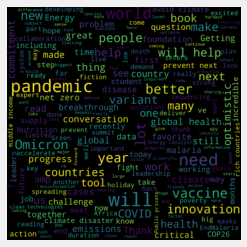

In [ ]:
#Plot the word cloud
allWords = ' '.join([twts for twts in df['Tweets']])

wordCloud = WordCloud(width = 1500, height = 1500, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Create a function to computer the negative, neutral and positive analysis
def getAnalysis(score) :
  if(score < 0) :
    return 'Negatve'

  elif (score == 0) :
    return 'Neutral'

  else :
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Genomic sequencing is a critical tool that wil...,0.400000,0.000000,Neutral
1,"The fight to eradicate HIV is far from over, b...",0.400000,0.220000,Positive
2,ICYMI here’s a recap of my conversation with ....,0.050000,-0.100000,Negatve
3,Thanks for taking the time today to discuss o...,0.100000,0.100000,Positive
4,: We definitely can. Thanks for your tim...,0.350000,0.100000,Positive
...,...,...,...,...
95,Great to see ’s commitment alongside global le...,0.338745,0.152814,Positive
96,. Energy Catalyst is bringing together private...,0.360417,0.041667,Positive
97,Unless smallholder farmers can adapt to climat...,0.250000,0.104167,Positive
98,"Thank you, . This $1B partnership between Ene...",0.800000,0.000000,Neutral


In [ ]:
# Print all positive tweets

j = 1

sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]) :
  if (sortedDF['Analysis'][i] == 'Positive'):
    print (str(j) + ') '+sortedDF['Tweets'][i] + '\n')
    j += 1

1) The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic. 

2) Thanks  for taking the time today to discuss omicron, vaccines, and how the world can come together to prevent the next pandemic. 

3) :       We definitely can. Thanks for your time &amp; insights &amp; let's continue the goo…

4)      .  has started the conversation about how we avoid the next pandemic which is important. I appreciate your work on this. We can do a lot better next time!!

5)     A more transmissive variant is not likely but we have been surprised a lot during this pandemic. Omicron will create a lot of immunity at least for the next year.   tracks the genetics really well. We may have to take yearly shots for Covid for some time.

6)     As countries experience their Omicron wave health systems will be challenged. M

In [ ]:
# Print all negative tweets

j = 1

sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]) :
  if (sortedDF['Analysis'][i] == 'Negative'):
    print (str(j) + ') '+sortedDF['Tweets'][i] + '\n')
    j += 1

Text(0, 0.5, 'Subjectivity')

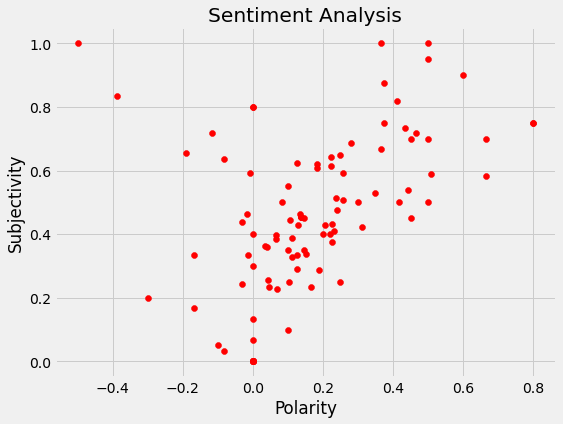

In [ ]:
# Plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]) :
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
# Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

69.0

In [ ]:
# Get percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

(ntweets.shape[0] / df.shape[0])*100

0.0

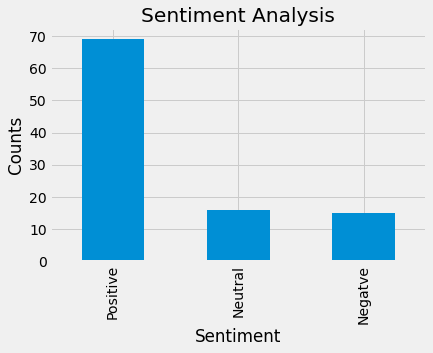

In [ ]:
# Show value counts

df['Analysis'].value_counts()

#plot and visualize counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()